In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: February 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
def make_data(n_samples=50, std=0.3):
    x = np.random.rand(n_samples) * 10
    err = np.random.normal(size=n_samples) * std
    y = np.sin(x) + err
    return x, y

x, y = make_data()
X = x.reshape(-1, 1)

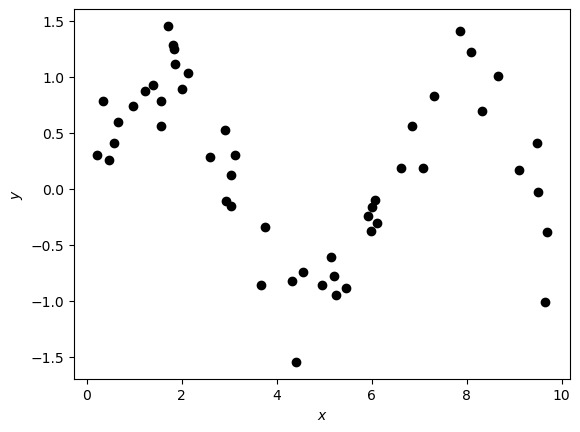

In [4]:
plt.scatter(x, y, color='k')
plt.xlabel('$x$')
plt.ylabel('$y$');

Ridge Regression

In [5]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

def RidgePolynomialRegression(degree, alpha=1):
    return Pipeline([('scaler', StandardScaler()),
                     ('poly', PolynomialFeatures(degree)),
                     ('ridge', Ridge(alpha))])

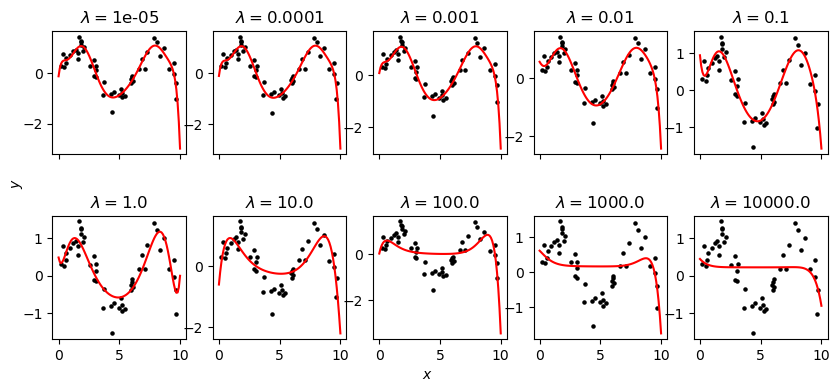

In [6]:
# Create a 2x5 subplot grid
fig, axes = plt.subplots(2, 5, figsize=(10, 4), sharex=True)
plt.subplots_adjust(hspace=0.5)

# Generate evenly spaced values from 0 to 10 for testing the polynomial fits
X_test = np.linspace(0, 10, 100).reshape(-1, 1)

# Loop over 10 iterations, increasing alpha by a factor of 10 each time
alpha = 0.00001 
for ax in axes.flat:
    # Plot the original data
    ax.scatter(X, y, color='k', s=5)
    
    # Create and fit the ridge polynomial regression model
    model = RidgePolynomialRegression(degree=10, alpha=alpha)
    model.fit(X, y)
    
    # Use the fitted model to predict values over the test range    
    y_test = model.predict(X_test)
    
    # Plot the predicted polynomial
    ax.plot(X_test, y_test, color='r')
    ax.set_title(f'$\lambda = ${alpha}')
   
    alpha *= 10
    
# Set common labels for the axes
fig.text(0.5, 0.02, '$x$', ha='center', va='center')
fig.text(0.09, 0.5, '$y$', ha='center', va='center', rotation='vertical')

plt.savefig('figures/ridge_regression.pdf')

In [7]:
alpha = 0.00001

# Loop over 10 iterations, increasing alpha by a factor of 10 each time
for i in range(10):
    # Create and fit the ridge polynomial regression model
    model = RidgePolynomialRegression(degree=10, alpha=alpha)
    model.fit(X, y)
    
    # Extract the intercept and coefficients from the fitted model
    intercept = model.named_steps['ridge'].intercept_
    coef = model.named_steps['ridge'].coef_[1:]    
    coef = np.hstack((intercept, coef))   
    print(np.round(coef, 3))
    
    alpha *= 10

[-0.963 -0.053  3.339 -2.75  -0.241  5.017 -2.465 -2.808  1.548  0.506
 -0.284]
[-0.963 -0.066  3.346 -2.678 -0.276  4.905 -2.413 -2.744  1.518  0.494
 -0.278]
[-0.96  -0.165  3.381 -2.114 -0.515  4.031 -2.026 -2.241  1.287  0.397
 -0.232]
[-0.929 -0.446  3.244 -0.506 -0.717  1.527 -1.284 -0.792  0.738  0.116
 -0.111]
[-0.818 -0.503  2.53   0.125 -0.125  0.208 -0.997  0.101  0.335 -0.073
 -0.013]
[-0.554 -0.405  1.281 -0.046  0.374  0.11  -0.23   0.23  -0.197 -0.096
  0.071]
[-0.228 -0.203  0.426 -0.042  0.292  0.023  0.091  0.02  -0.128  0.011
  0.009]
[ 0.032 -0.051  0.082 -0.025  0.079 -0.011  0.062 -0.002  0.024  0.014
 -0.023]
[ 0.166 -0.006  0.012 -0.002  0.015  0.001  0.018  0.003  0.017 -0.004
 -0.007]
[ 0.222 -0.001  0.001 -0.     0.002 -0.     0.003 -0.     0.003 -0.003
 -0.001]


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'poly__degree': np.arange(1, 21),  
    'ridge__alpha': np.logspace(-5, 4, num=10)
}
grid = GridSearchCV(RidgePolynomialRegression(degree=10), param_grid, cv=5, n_jobs=-1)
grid.fit(X, y)

print(grid.best_params_)

{'poly__degree': 4, 'ridge__alpha': 0.1}


Lasso Regression

In [9]:
from sklearn.linear_model import Lasso

def LassoPolynomialRegression(degree, alpha=1):
    return Pipeline([('scaler', StandardScaler()),
                     ('poly', PolynomialFeatures(degree)),
                     ('lasso', Lasso(alpha))])

C:\Users\roi_y\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.714e+00, tolerance: 2.700e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\roi_y\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.721e+00, tolerance: 2.700e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\roi_y\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+00, toleranc

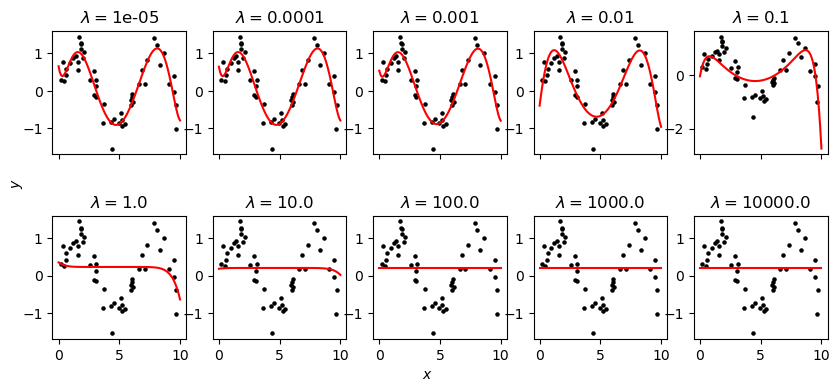

In [10]:
# Create a 2x5 subplot grid
fig, axes = plt.subplots(2, 5, figsize=(10, 4), sharex=True)
plt.subplots_adjust(hspace=0.5)

# Loop over 10 iterations, increasing alpha by a factor of 10 each time
alpha = 0.00001
for ax in axes.flat:
    # Plot the original data
    ax.scatter(X, y, color='k', s=5)
    
    # Create and fit the lasso polynomial regression model
    model = LassoPolynomialRegression(degree=10, alpha=alpha)
    model.fit(X, y)
    
    # Use the fitted model to predict values over the test range    
    y_test = model.predict(X_test)
    
    # Plot the predicted polynomial
    ax.plot(X_test, y_test, color='r')
    ax.set_title(f'$\lambda = ${alpha}')
    
    alpha *= 10
    
# Set common labels for the axes
fig.text(0.5, 0.02, '$x$', ha='center', va='center')
fig.text(0.09, 0.5, '$y$', ha='center', va='center', rotation='vertical')

plt.savefig('figures/lasso_regression.pdf')

In [11]:
alpha = 0.00001

# Loop over 10 iterations, increasing alpha by a factor of 10 each time
for i in range(10):
    # Create and fit the lasso polynomial regression model
    model = LassoPolynomialRegression(degree=10, alpha=alpha)
    model.fit(X, y)
    
    # Extract the intercept and coefficients from the fitted model
    intercept = model.named_steps['lasso'].intercept_
    coef = model.named_steps['lasso'].coef_[1:]    
    coef = np.hstack((intercept, coef))    
    print(np.round(coef, 3))
    
    alpha *= 10

[-0.886 -0.598  3.128  0.276 -1.33   0.275 -0.042 -0.041  0.036 -0.032
  0.014]
[-0.884 -0.595  3.116  0.274 -1.319  0.273 -0.044 -0.04   0.035 -0.031
  0.014]
[-0.865 -0.569  2.999  0.258 -1.206  0.248 -0.061 -0.031  0.029 -0.03
  0.014]
[-0.683 -0.299  1.882  0.031 -0.108  0.085 -0.279  0.036  0.    -0.013
  0.011]
[-0.215 -0.04   0.676 -0.     0.    -0.     0.     0.    -0.     0.01
 -0.012]
[ 0.232 -0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.002
 -0.   ]
[ 0.205 -0.     0.    -0.     0.    -0.    -0.    -0.    -0.    -0.
 -0.   ]
[ 0.196 -0.     0.    -0.     0.    -0.    -0.    -0.    -0.    -0.
 -0.   ]
[ 0.196 -0.     0.    -0.     0.    -0.    -0.    -0.    -0.    -0.
 -0.   ]
[ 0.196 -0.     0.    -0.     0.    -0.    -0.    -0.    -0.    -0.
 -0.   ]


C:\Users\roi_y\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.714e+00, tolerance: 2.700e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\roi_y\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.721e+00, tolerance: 2.700e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\roi_y\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+00, toleranc

Elastic Net Regression

In [12]:
from sklearn.linear_model import ElasticNet

def ElasticNetPolynomialRegression(degree, alpha=1, l1_ratio=0.5):
    return Pipeline([('scaler', StandardScaler()),
                     ('poly', PolynomialFeatures(degree)),
                     ('elastic_net', ElasticNet(alpha=alpha, l1_ratio=l1_ratio))])

C:\Users\roi_y\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.549e+00, tolerance: 2.700e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


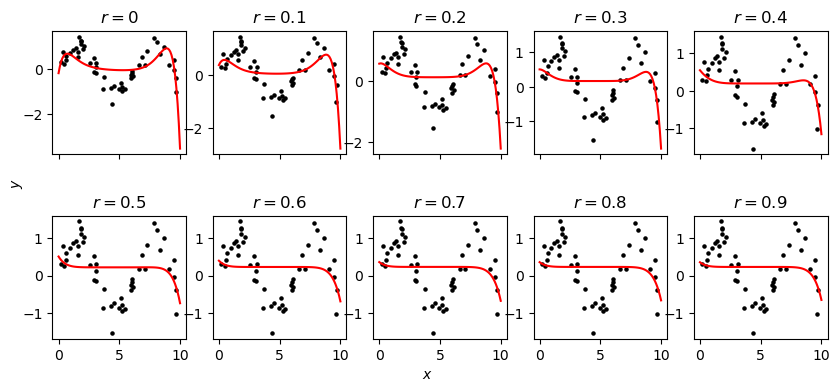

In [13]:
# Create a 2x5 subplot grid
fig, axes = plt.subplots(2, 5, figsize=(10, 4), sharex=True)
plt.subplots_adjust(hspace=0.5)

l1_ratio = 0

# Iterate over the subplots
for ax in axes.flat:
    # Plot the original data
    ax.scatter(X, y, color='k', s=5)
    
    # Create and fit the elsastic net polynomial regression model
    model = ElasticNetPolynomialRegression(degree=10, alpha=1, l1_ratio=l1_ratio)
    model.fit(X, y)
    
    # Use the fitted model to predict values over the test range    
    y_test = model.predict(X_test)
    
    # Plot the predicted polynomial
    ax.plot(X_test, y_test, color='r')
    ax.set_title(f'$r = ${round(l1_ratio, 1)}')
   
    # Increase l1_ratio for the next iteration
    l1_ratio += 0.1
    
# Set common labels for the axes
fig.text(0.5, 0.02, '$x$', ha='center', va='center')
fig.text(0.09, 0.5, '$y$', ha='center', va='center', rotation='vertical')

plt.savefig('figures/elastic_net_regression.pdf')